Support Vector Machine



jupyter kernelspec uninstall myenv
deactivate virtual env

In [95]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


In [55]:
df = pd.read_csv('/Users/celeritas/Documents/Codes/NLP codes/cell_samples_new.csv')



In [56]:
df.head()



,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [57]:
df.tail()
df.shape
df.size
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [58]:
df['Class'].value_counts()


Class
2    458
4    241
Name: count, dtype: int64

Distribution of classes

In [68]:
benign_df = df[df['Class'] == 2][:200]
malignant_df = df[df['Class'] == 4][:200]

<Axes: xlabel='Clump', ylabel='UnifSize'>

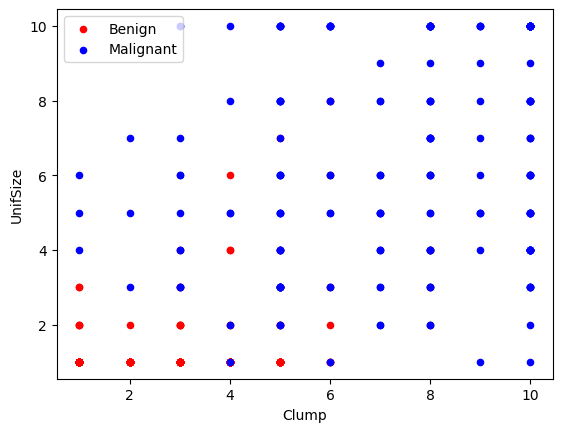

In [73]:
# help(benign_df.plot)

axis= benign_df.plot(kind= 'scatter', x='Clump',y='UnifSize',color = 'red', label= 'Benign')
malignant_df.plot(kind= 'scatter', x='Clump',y='UnifSize',color = 'blue', label= 'Malignant', ax=axis)

Identifying Unwanted Rows

In [74]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [76]:
df['BareNuc']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 699, dtype: object

In [82]:
# discarding row that has non numeric value in 'BareNuc' column
# to do this first converting all the non-numeric value present in 'BareNuc' column value to numeric(int)

df = df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Removing Unwanted Columns

In [85]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [107]:
# removing class and ID attribute from the above and creating a feature datafram and assigning it.

feature_df = df[['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']]


# seperating dependent and independent variables as X and Y

# Independent variable
X = np.asarray(feature_df)

# Dependent variable
y = np.asarray(df['Class'])

Divide dataset into Train & Test

In [118]:
'''
converting df into test and train
Train(X,y) where X is 2d array and y is 1d array
Test(X,y) 
'''
from sklearn.model_selection import train_test_split



X_train, X_test, y_train,y_test = (train_test_split(X,y,test_size=0.2,random_state=4))



In [127]:
print(f'shape of X_train : {X_train.shape}' )
print(f'shape of X_test : {X_test.shape} ')
print(f'shape of y_train : {y_train.shape}' )
print(f'shape of y_test : {y_train.shape}' )

shape of X_train : (546, 11)
shape of X_test : (137, 11) 
shape of y_train : (546,)
shape of y_test : (546,)


In [121]:
X_test.shape

(137, 11)

Modeling SVM with Sklearn 

In [133]:
from sklearn import svm

classfier = svm.SVC(kernel='linear', gamma='auto',C=2)
classfier.fit(X_train,y_train)
y_predict = classfier.predict(X_test)



Evaluation 

In [135]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.68      0.99      0.81        90
           4       0.83      0.11      0.19        47

    accuracy                           0.69       137
   macro avg       0.76      0.55      0.50       137
weighted avg       0.73      0.69      0.59       137

